# Assignment Digital Signal & Image Processing
Giulia Benvenuto s4678610

## Fourier Series
Compute the Fourier expansion of a real valued
function f where:
* $a$ is sampled uniformly in the interval $[-2,-1]$
* $b$ is sampled uniformly in the interval $[1,2]$
* The function $f:[a,b] \rightarrow \mathbb{R}$ id defined as: <br>
<center>
$
\begin{equation}
f(t)=
    \begin{cases}
        pe^{qt}sin(ln(1+rt^2)) &  t \in [a,0)\\
        s & t \in [0,b]
    \end{cases}
\end{equation}
$ 
</center>

* $p$, $q$, $r$ and $s$ are sampled uniformly in the interval $[0, 1]$

Comment the results you obtain, Gibbs phenomenon included, when using the first 20, 40, and 60
harmonics.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

## Uniform sampling
$a$, $b$, $p$, $q$, $r$ and $s$ uniformly sampled in their given intervals with the ${\tt numpy.random.uniform}$ function.

In [8]:
a = np.random.uniform(-2, np.nextafter(-1, 0))
b = np.random.uniform(1, np.nextafter(2, 3))

p = np.random.uniform(0, np.nextafter(1, 2))
q = np.random.uniform(0, np.nextafter(1, 2))
r = np.random.uniform(0, np.nextafter(1, 2))
s = np.random.uniform(0, np.nextafter(1, 2))

## Choice of sampling values
Take a point every delta = 0.0001 starting from *a* until we get to *b*, so we're choosing the points in which our function will be evaluated along the x axis. 

In [9]:
delta = 0.0001
t = np.arange(a, np.nextafter(b, 3), delta)

print("a:" ,a)
print("b:" ,b)

a: -1.825545487086942
b: 1.7108362336877265


## $f(t)$
The signal $f(t)$ is a piece-wise constant function, the discontinuity point is in 0. 
- Between $[a,0)$ it is a siusoidal function. 
- Between $[0,b]$ it is a constant function.   

In [10]:
# Definition of the signal f(t):
def f(t):
  if t >= a and t <= 0 :
    return p * np.exp(q * t) * np.sin(np.log(1 + r * (t**2)))
  elif t >= 0 and t <= b :
    return s

## Evaluation and plot of the signal
Computation of the value of the signal in the sampling values stored in *t*. For each value of the array "t" is computed the value of the signal by calling the function "f(t)". 
<br>
Then the signal f(t) is plotted. 


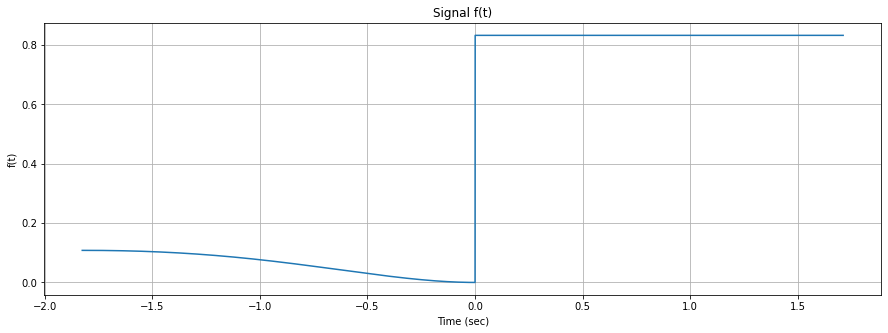

In [11]:
# Evaluation of the function f(t) with t a set of time samples between a and b:
y = np.zeros(len(t))
for i in range(len(t)):
        y[i] = f(t[i])

plt.plot(t, y)
plt.title("Signal f(t)")
plt.xlabel("Time (sec)")
plt.ylabel("f(t)")
plt.grid(True)
plt.show()

# https://stackoverflow.com/questions/31638508/plot-piecewise-function-in-python

## Fourier Series
The given function $f(t)$ is a piece-wise constant function and we know that any piece-wise continuous function can be written as a linear combination of a fixed and countable set of functions and can thus represented as a discrete sequence of real numbers which are the components, computed by taking the scalar product (projection) between the function and each basis element. 

In order to find this expansion for $f(t)$ which is the Fourier Series I used the function *fseries* which was already given in the lab but it was implemented taking the assumption that the signal was always defined over $[0,2\pi]$.

In this assignment the signal is defined over $[a,b]$ so I modified this function to fit this case according to the Fourier Serie expansion on a generic interval:
<br>
<center>
  $f(x)=\frac{a_0}{2} + \sum_{n=1}^\infty (a_n cos(\frac{n\pi x}{L}))+(b_n sin (\frac{n\pi x}{L}))$
</center>
<br>
where 
<br>
<center>
  $L = \frac{b-a}{2}$
</center>
and Fourier coefficients are calculated as follows:
<center>
  $a_0 = \frac{1}{L} \int_{-L}^L f(x) \;dx$
  <br>
  <br>
  $a_n = \frac{1}{L} \int_{-L}^L f(x)cos(\frac{n\pi x}{L}) \;dx$
  <br>
  <br>
  $b_n = \frac{1}{L} \int_{-L}^L f(x)sin(\frac{n\pi x}{L}) \;dx$
  <br>
  <br>
  $n = 1,2,3,...$
</center>


<br>
The scaling factor is defined as $\frac{b-a}{len(x)}$ because in the assignment case we assumed that the signal is defined over the interval $[a,b]$ with $len(x)$ points and we need to take care of normalizing when we compute an integral as a discrete sum.
<br>
$a_0$ is the projection of the signal on $\phi_0$, the constant function in the basis correctly normalized taking in account both the scaling factor deriving from using discrete x instead of an integral and the missing normalizing constant in the fourier series definition.
<br>
The $a_n$ and $b_n$ coefficients are computed by projecting the signal on the various harmonics and by scaling them. 

In [12]:
def fseries(x, signal, K): 
  """
  Returns an approximation of a given signal with a Fourier series␣, →approximation of K coefficients.
  Parameters:
  ----------
  x: independent variable (time)
  signal: function of x to be approximated
  K: number of harmonics to be used
  Returns:
  --------
  series: Fourier series of the signal
  a_0: coefficient with k=0
  a: array of coefficients for odd components 
  b: array of coefficients for even components 
  """
  ## reconstructed signal
  xr = np.zeros(len(x))
  
  ## scaling factor
  c = (x[-1]-x[0]) / len(x)

  a_0 = np.dot(signal, np.ones(len(x))) ## average of the signal over the range
  a_0 = c * a_0 * (1 / ((x[-1]-x[0]) / 2))
  
  ## Fourier coefficients arrays
  A = np.zeros(x.shape)
  B = np.zeros(x.shape)
  series = np.zeros(x.shape)

  for k in range(1,K+1):
        ## evaluates coefficients:
        a_k = c * np.dot(signal, np.cos((k*x*np.pi) / ((x[-1]-x[0]) / 2))) * (1 / ((x[-1]-x[0]) / 2))
        A[k-1]=a_k

        b_k = c * np.dot(signal, np.sin((k*x*np.pi) / ((x[-1]-x[0]) / 2))) * (1 / ((x[-1]-x[0]) / 2))
        B[k-1]=b_k
        
        ## computes series
        xr = xr + a_k * np.cos((k*x*np.pi) / ((x[-1]-x[0]) / 2)) + b_k * np.sin((k*x*np.pi) / ((x[-1]-x[0]) / 2))

  series = (1/2*a_0) + xr
  return series, a_0, A, B

## Fourier Series using 20, 40, 60 harmonics
Using a finite number of harmonics in the Fourier Series means approximating a periodic signal with a limited number of sine and cosine waves in the basis, rather than an infinite number of them. The more harmonics used, the better the approximation will be, but the computation becomes more complex. The choice of the number of harmonics to use depends on the desired level of accuracy. 

In fact if $f(t)$ (as in this case) is a piece-wise continuous function if we consider a point of continuity $x$ of the signal, for all $\epsilon > 0$ (accuracy value) there exists $N^*$ (number of harmonics) such that for all $N \ge N^*$: $|\frac{a_0}{2} + \sum_{n=1}^{N} a_n cos(nx)+b_n sin(nx) - f(x)| < \epsilon$. 

The intuition behind is that if you fix a level of accuracy $\epsilon$ it ensures the existance of a unique value $N^*$ such that the Fourier Series truncated after the first $n^*$ terms is no more than $\epsilon$ different from the original function $f(t)$. 

In this exercise we don't fix an accuracy level but we simply try to gradually increase the number of harmonics, starting from 20, then 40 and 60 at the end. Following the reasoning done I expect that with 20 harmonics the Foruier Series approximation will be coarse and as the number of harmonics is increased also the accuracy in the approximation will increase. 

We can also note that the Fourier Series has more difficulty in the approximation of the interval $[0,b]$ in which $f(t)$ is constant this is due to the fact that a constant function doesn't have a periodicity which is the key concept in the Foruier analysis.  Since a constant function is not periodic, it cannot be represented exactly by a finite sum of sine and cosine functions. The result is that, even if an infinite number of terms are used, the approximation of a constant function by a Fourier series will not converge to the actual constant value, but instead, it will oscillate around it. 

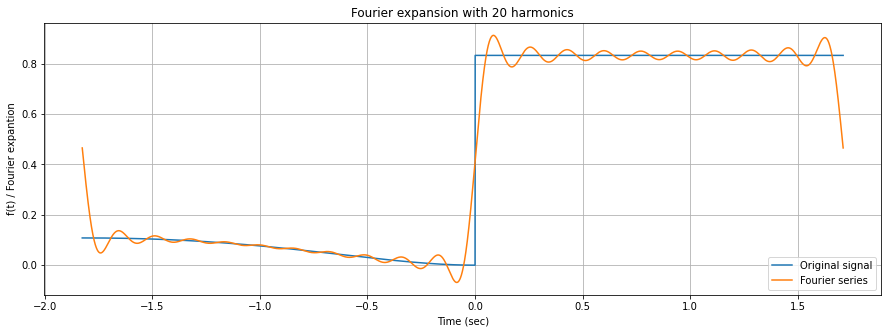

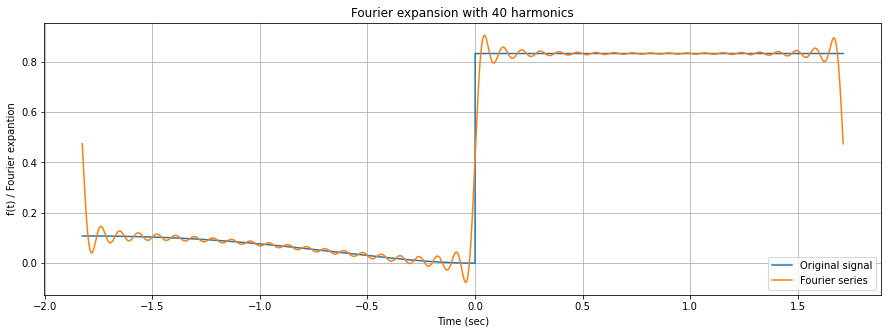

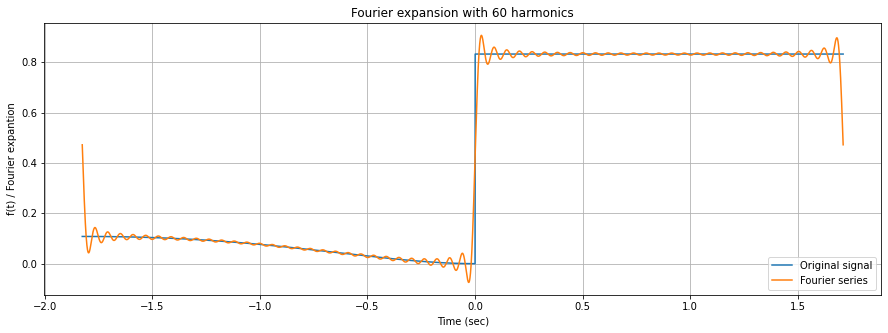

In [13]:
for i in range (20, 61, 20): 
  series, a_0, _, _ = fseries(t, y, i)
  plt.plot(t, y, label='Original signal')
  plt.plot(t, series, label='Fourier series')
  plt.title("Fourier expansion with %d harmonics"%i)
  plt.xlabel("Time (sec)")
  plt.ylabel("f(t) / Fourier expantion")
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

If I make only one plot, we can see more clearly that the maximum value of the overshoot and the minimum value of the undershoot are constant when using 20, 40 or 60 harmonics, the only thing that changes is their position respect to the discontinuity point in zero. If the number of harmonics used is low the maximum value of the overshoot will be "distant" from the discontinuity point, instead when the number of hermonics used is higher the maximum value of the overshoot will be closer to the discontinuity.

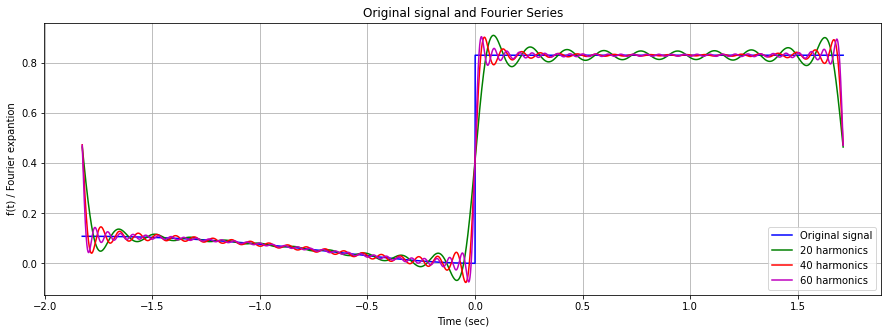

In [15]:
series20, a_0, _, _ = fseries(t, y, 20)
series40, a_0, _, _ = fseries(t, y, 40)
series60, a_0, _, _ = fseries(t, y, 60)

plt.plot(t, y, label='Original signal', color='b')
plt.plot(t, series20, label='20 harmonics', color='g')
plt.plot(t, series40, label='40 harmonics', color='r')
plt.plot(t, series60, label='60 harmonics', color='m')
plt.title("Original signal and Fourier Series")
plt.xlabel("Time (sec)")
plt.ylabel("f(t) / Fourier expantion")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Gibbs Phenomenon
Our $f$ function is a discontinuous function that has a jump in zero. Its Fourier expansion is composed of infinite terms, but we decide to truncate it using only 20, 40 or 60 harmoics. Using a finite amount of harmonics to compute the Fourier Series of a function with discontinuities introduces the *Gibbs Phenomenon*.

The *Gibbs Phenomenon* tells us that if our series is truncated, the reconstruction of the signal will overshoot on the high side of the jump and undershoot on the low side of the jump and we also know that the amount of overshoot and undershoot is proportional to the size of the gap, about 9% of the gap.

Even if we increase the number of harminics, the overshoot and the undershoot will not disappear, their peak value will remain constant while their positions will be closer and closer to the point of discontinuity. In fact we can see that for the 20 harminics case the overshoot and the undershoot are more distant from zero (point of discontinuity) respect to their position in the case of 40 harminics. And for the case of 60 harmoinics we notice that they are really close to zero.

## Approximate computation of the peak value
Since the maximum value of the overshoot should be around 9% of the jump height I tried to compute its value with this approximation and check if it correspond to the real maximum value of the Fourier Series. 

I computed the value of the function right before the jump, precisely in $t = -0.0001 = -delta$.

We already know the value right after the jump, it's $s$ by definition of the function $f(t)$.

In [16]:
t_before = -delta 

# Evaluate the function right before and after the discontinuity:
before_jump = p * np.exp(q * t_before) * np.sin(np.log(1 + r * (t_before**2)))
after_jump = s

print("Value right before the jump:",before_jump)
print("Value right after the jump:",after_jump)

jump = after_jump - before_jump
print("Jump height:",jump)

peak_perc = jump * (9/100)

peak_value = s + peak_perc
print("Approximation of the overshoot's maximum value:",peak_value)

real_max = max(series20)
print("Real overshoot's maximum value:",real_max)

Value right before the jump: 1.7982974841968167e-09
Value right after the jump: 0.8322172557229494
Jump height: 0.8322172539246518
Approximation of the overshoot's maximum value: 0.907116808576168
Real overshoot's maximum value: 0.9117211769367486


As we expect the overshoot's maximum value computed as 9% of the height of the jump is really similar to its real value computed with the max function.